In [18]:
import pyreadr
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

result = pyreadr.read_r('..\data\small_area_data_uk\sampled-data\wales_sa_data_sample.rds') # also works for RData-data
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = result[None] # extract the pandas data frame 

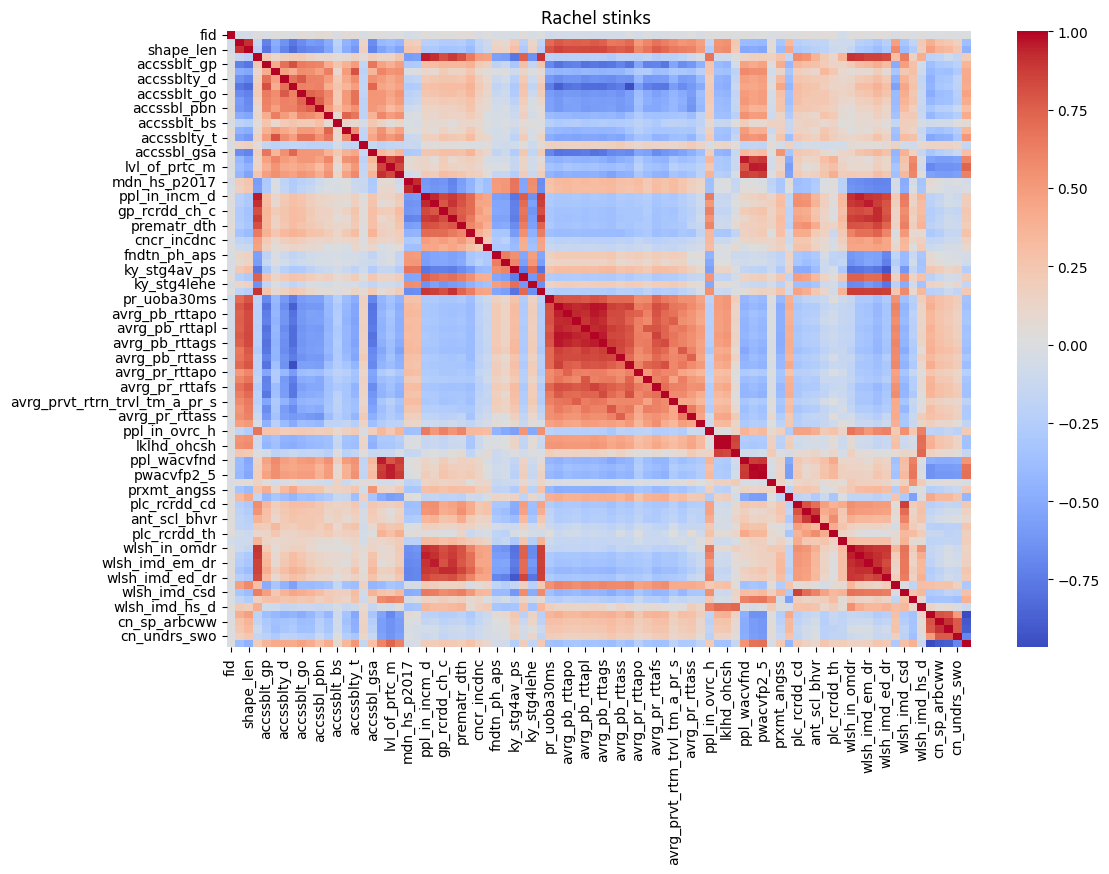

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
# print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Rachel stinks ')
plt.show()


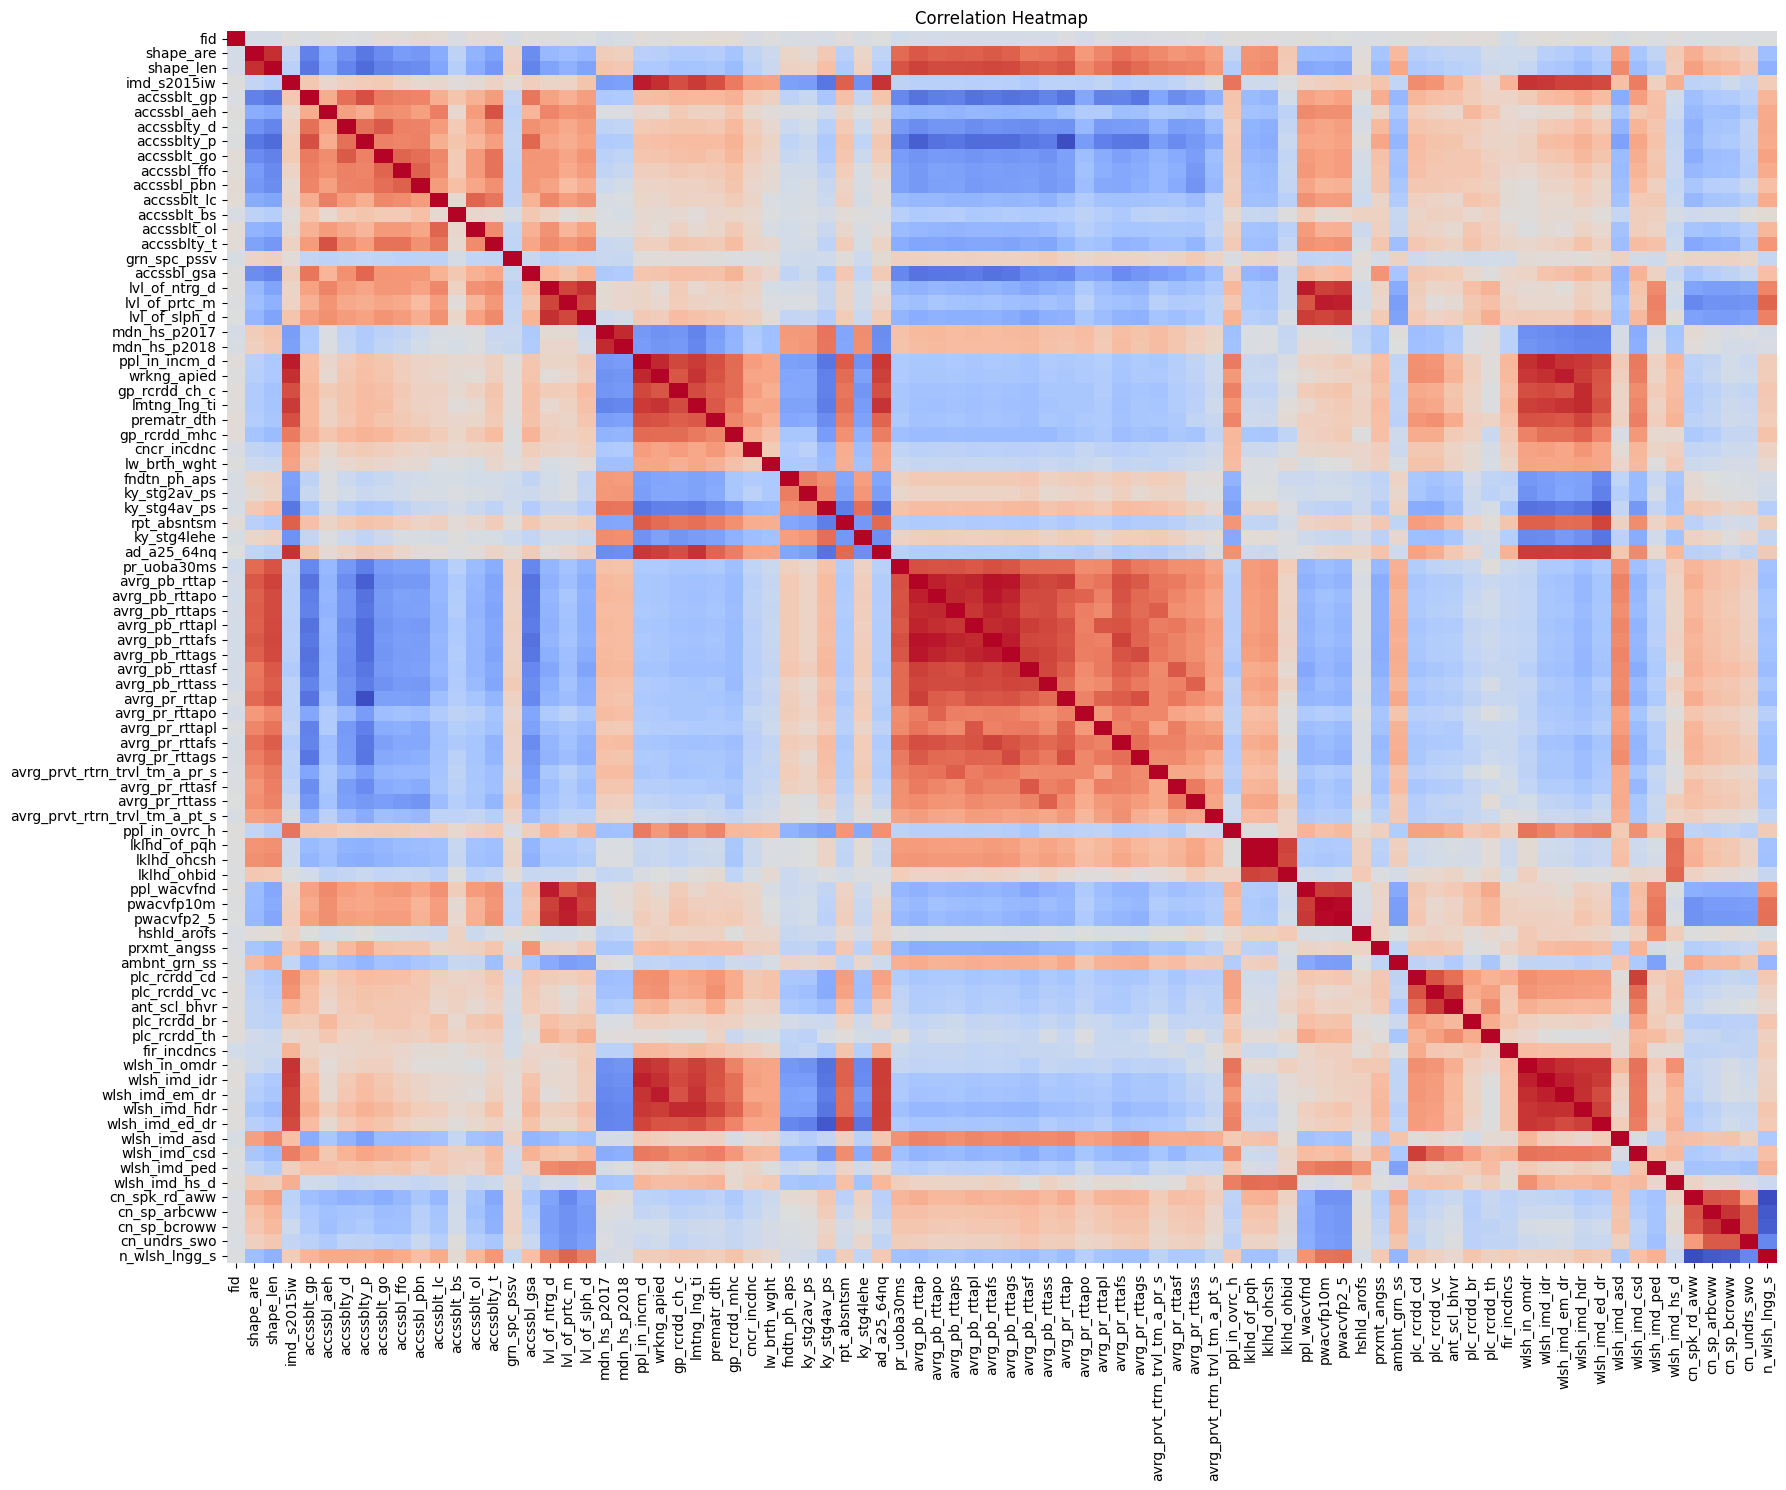

In [17]:
# %matplotlib qt #doesn't work rn - need to install Pyside2
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a larger heatmap with row and column labels
plt.figure(figsize=(20, 16))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar_kws={"orientation": "horizontal"})
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            pr_uoba30ms   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     47.37
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           9.01e-12
Time:                        22:53:01   Log-Likelihood:                -5135.1
No. Observations:                1334   AIC:                         1.027e+04
Df Residuals:                    1332   BIC:                         1.028e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.4392      0.500     18.887   

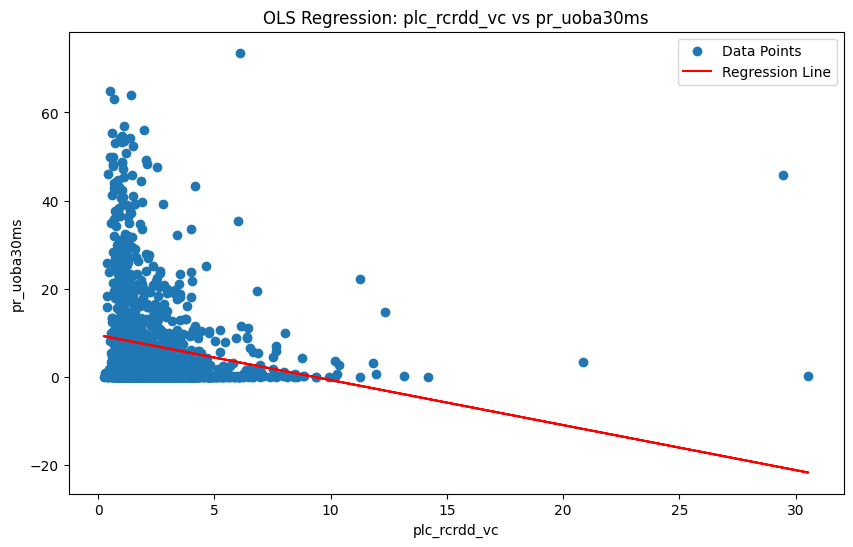

In [19]:
# Select relevant columns for the regression
data = df[['plc_rcrdd_vc', 'pr_uoba30ms']].dropna()

# Add a constant term to the independent variable
X = sm.add_constant(data['plc_rcrdd_vc'])

# Create the model
model = sm.OLS(data['pr_uoba30ms'], X)

# Fit the model
results = model.fit()

# Print the regression summary
print(results.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['plc_rcrdd_vc'], data['pr_uoba30ms'], label='Data Points')
plt.plot(data['plc_rcrdd_vc'], results.fittedvalues, color='red', label='Regression Line')
plt.title('OLS Regression: plc_rcrdd_vc vs pr_uoba30ms')
plt.xlabel('plc_rcrdd_vc')
plt.ylabel('pr_uoba30ms')
plt.legend()
plt.show()
